<a href="https://colab.research.google.com/github/Facco-Bruno/Alura-Python/blob/Master/Regression_and_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
dados = pd.read_csv('dados.csv')

In [54]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [55]:
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [56]:
dataset.shape

(50, 2)

In [57]:
dataset.describe()

,Y,X
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


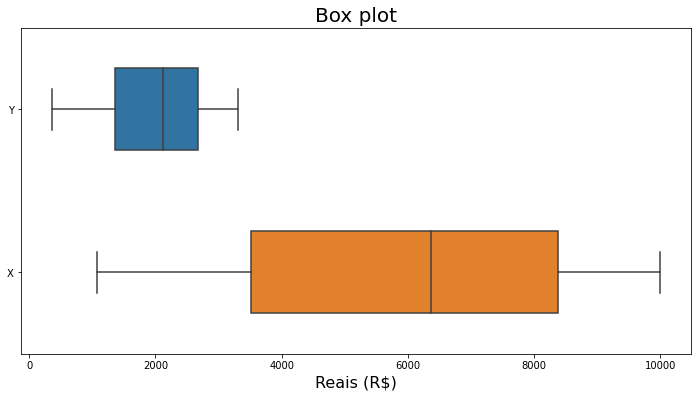

In [58]:
ax = sns.boxplot(data=dataset, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

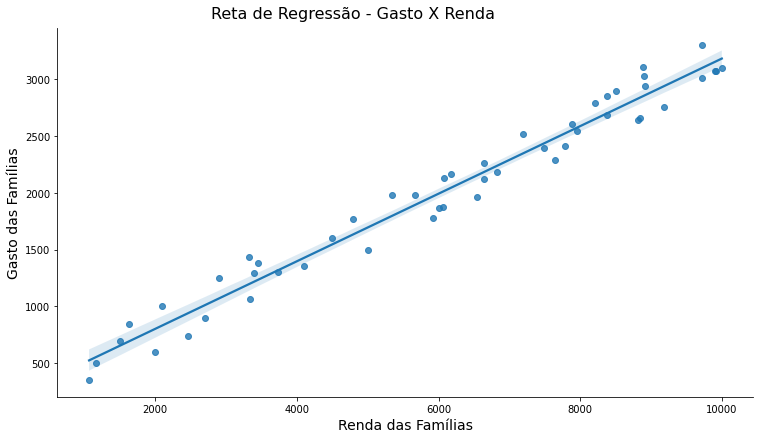

In [59]:
ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

In [60]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


In [61]:
import statsmodels.api as sm

In [62]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
Y.head()

0    3011
1    1305
2    1879
3    2654
4    2849
Name: Y, dtype: int64

In [64]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


In [65]:
resultado_regressao = sm.OLS(Y, X).fit()

In [66]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           3.56e-38
Time:                        13:09:37   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

In [67]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


In [68]:
amostra = dados.query('Renda < 5000').sample(n = 20, random_state = 101)

In [69]:
amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov()

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


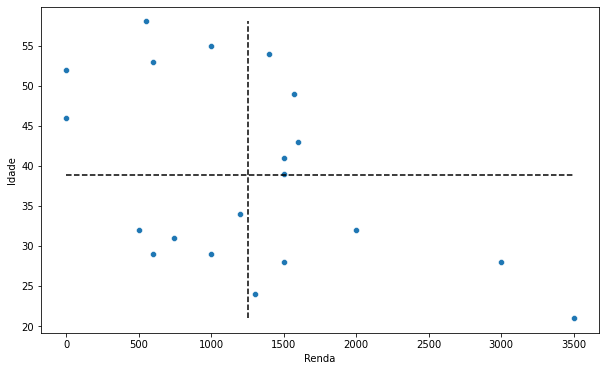

In [70]:
x = amostra.Renda
y = amostra.Idade

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


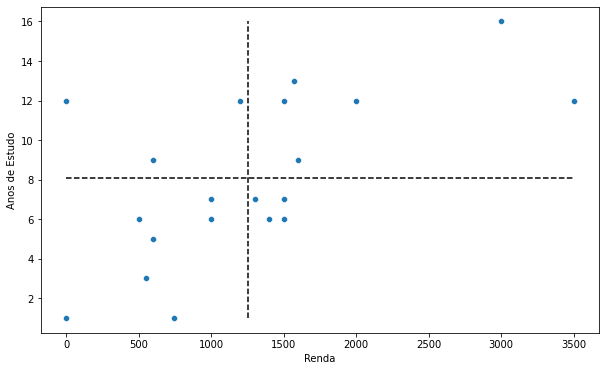

In [71]:
x = amostra.Renda
y = amostra['Anos de Estudo']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


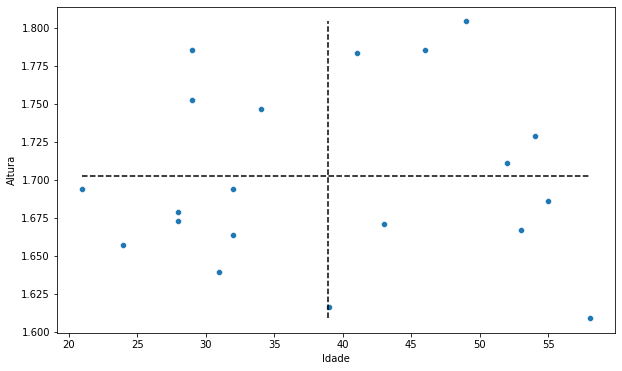

In [72]:
x = amostra.Idade
y = amostra.Altura

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


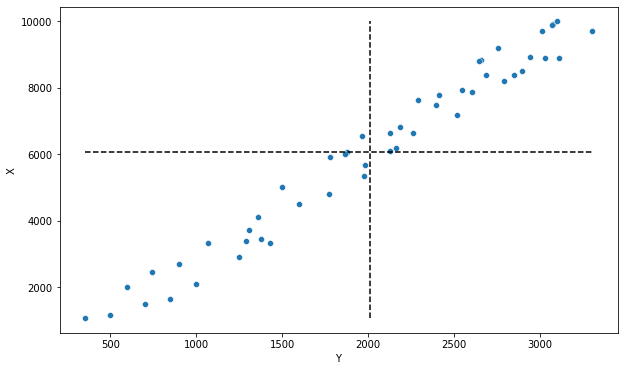

In [73]:
x = dataset.Y
y = dataset.X

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

In [74]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [75]:
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


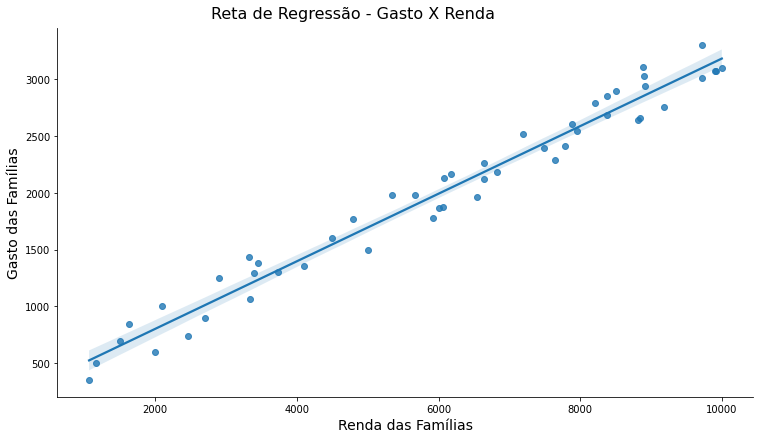

In [76]:
ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

In [77]:
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


In [78]:
dataset['X2'] = dataset.X ** 2

In [79]:
dataset['Y2'] = dataset.Y ** 2

In [80]:
SOMA_Y = dataset.Y.sum()

In [81]:
SOMA_X = dataset.X.sum()

In [82]:
SOMA_X2 = dataset.X.apply(lambda x: x**2).sum()

In [83]:
SOMA_Y2 = dataset.Y.apply(lambda y: y**2).sum()

In [84]:
dataset['XY'] = dataset.X * dataset.Y

In [85]:
SOMA_XY = dataset.apply(lambda data: data.X * data.Y, axis = 1).sum()

In [86]:
dataset.drop(['X2', 'XY'], axis = 1, inplace = True)

In [87]:
n = len(dataset)
numerador = n * SOMA_XY - SOMA_X * SOMA_Y
denominador = n * SOMA_X2 - (SOMA_X)**2
beta_2 = numerador / denominador

In [88]:
beta_1 = dataset.Y.mean() - beta_2 * dataset.X.mean()

In [89]:
beta_1

207.90331377756547

In [90]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

In [92]:
resultado_regressao.params

const    207.903314
X          0.297291
dtype: float64

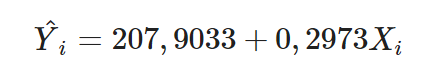

In [93]:
dataset['Y_previsto'] = beta_1 + beta_2 * dataset.X

In [94]:
dataset['Y_previsto_statsmodels'] = resultado_regressao.predict()

In [95]:
dataset.head()

,Y,X,Y2,Y_previsto,Y_previsto_statsmodels
0,3011,9714,9066121,3095.785086,3095.785086
1,1305,3728,1703025,1316.203010,1316.203010
2,1879,6062,3530641,2010.079483,2010.079483
3,2654,8845,7043716,2837.439476,2837.439476
4,2849,8378,8116801,2698.604723,2698.604723


In [96]:
dataset.drop(['Y_previsto_statsmodels'], axis = 1, inplace = True)

In [97]:
def prever(x):
  return beta_1 + beta_2 * x

In [98]:
prever(7510)

2440.5564031404347

In [99]:
resultado_regressao.predict([1, 7510])[0]

2440.556403140435

In [100]:
dataset['u'] = dataset.Y - dataset.Y_previsto

In [101]:
dataset.head()

,Y,X,Y2,Y_previsto,u
0,3011,9714,9066121,3095.785086,-84.785086
1,1305,3728,1703025,1316.203010,-11.203010
2,1879,6062,3530641,2010.079483,-131.079483
3,2654,8845,7043716,2837.439476,-183.439476
4,2849,8378,8116801,2698.604723,150.395277


In [102]:
dataset['Residuos'] = resultado_regressao.resid

In [103]:
dataset.head()

,Y,X,Y2,Y_previsto,u,Residuos
0,3011,9714,9066121,3095.785086,-84.785086,-84.785086
1,1305,3728,1703025,1316.203010,-11.203010,-11.203010
2,1879,6062,3530641,2010.079483,-131.079483,-131.079483
3,2654,8845,7043716,2837.439476,-183.439476,-183.439476
4,2849,8378,8116801,2698.604723,150.395277,150.395277


In [104]:
dataset.drop(['Y2'], axis = 1, inplace = True)

In [105]:
dataset.head()

,Y,X,Y_previsto,u,Residuos
0,3011,9714,3095.785086,-84.785086,-84.785086
1,1305,3728,1316.203010,-11.203010,-11.203010
2,1879,6062,2010.079483,-131.079483,-131.079483
3,2654,8845,2837.439476,-183.439476,-183.439476
4,2849,8378,2698.604723,150.395277,150.395277


In [106]:
dataset.drop(['u'], axis = 1, inplace = True)
dataset.head()

,Y,X,Y_previsto,Residuos
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


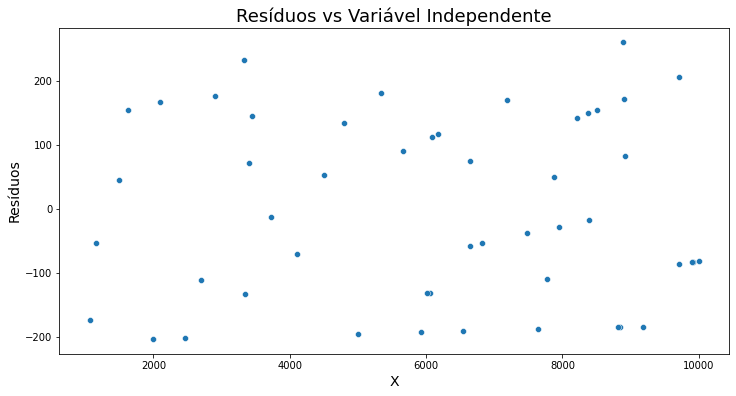

In [107]:
ax = sns.scatterplot(x=dataset.X, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

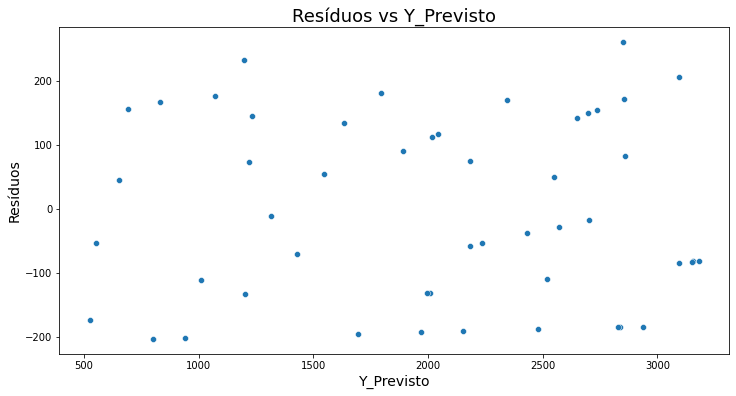

In [108]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

In [109]:
SQE = dataset.Residuos.apply(lambda u: u**2).sum()
SQE

984986.0375191914

In [110]:
# Utilizando o ssr (sum of squared residuals) do statsmodels
resultado_regressao.ssr

984986.0375191915

In [111]:
SQT = dataset.Y.apply(lambda y: (y - dataset.Y.mean())**2).sum()
SQT

32724149.279999997

In [112]:
SQR = dataset.Y_previsto.apply(lambda y: (y - dataset.Y.mean())**2).sum()
SQR

31739163.242480807

In [113]:
resultado_regressao.rsquared

0.9699003317369297

In [114]:
import statsmodels.api as sm
import pandas as pd

teste = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}
data = pd.DataFrame(teste)

Y = data.Y
X = sm.add_constant(data.X)

resultado_regressao = sm.OLS(Y, X, missing='drop').fit()
resultado_regressao.rsquared

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.9967917066613234

In [115]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7767.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.07e-32
Time:                        13:29:42   Log-Likelihood:                -194.05
No. Observations:                  27   AIC:                             392.1
Df Residuals:                      25   BIC:                             394.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -168.3212     77.566     -2.170      0.0

In [116]:
import statsmodels.api as sm
import pandas as pd

dataset = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}
dataset = pd.DataFrame(dataset)

Y = dataset.Y
X = sm.add_constant(dataset.X)

resultado_regressao = sm.OLS(Y, X, missing='drop').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
